1. Portal da Transparência
==

[Portal da Transparência](http://www.portaldatransparencia.gov.br/) is a Brazilian government portal dedicated to making public all expenditures of the federal government. It has a list of all expenses and money transfers the federal government has made.

1.1 Motivations

- How many employees do the IES (*instituições de ensino superior*) have?
- What is the gender gap between the employees? 
    - https://www.dicionariodenomesproprios.com.br/
    - https://gender-api.com/
    - https://pypi.python.org/pypi/Genderize
    - http://fmeireles.com/blog/rstats/genderbr-predizer-sexo


2. Number of employees by IES
==

- [Units of Ministry of Education]( http://www.portaltransparencia.gov.br/servidores/OrgaoExercicio-ListaOrgaos.asp?CodOS=15000)

### 2.1 Identifying the URL structure

In [39]:
# import package
from requests import get

# specify the url
url = 'http://www.portaldatransparencia.gov.br/servidores/\
OrgaoExercicio-ListaOrgaos.asp?CodOS=15000'

# packages the request, send the request and catch the response
response = get(url)

# extract the text
text = response.text

print(text[:500])

<!-- intancia o include para obter a connection string -->


<!DOCTYPE HTML>
<html lang="pt-BR">
<head>
  <title>
    Portal da Transparência - SERVIDORES CIVIS E MILITARES DO PODER EXECUTIVO FEDERAL - POR ÓRGÃO DE EXERCÍCIO DO SERVIDOR
  </title>
	
	<meta name="robots" content="none" />
	<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" />

	<link rel="shortcut icon" href="/favicon.ico?v=4.38.3" />
	<link rel="icon" type="image/png" href="/images/favicon.png?


### 2.1 Understanding the HTML structure of a single page

In [40]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [41]:
# information about IES is within a table element
unit_table = html_soup.find_all('table')

In [42]:
# there are two table elements 
len(unit_table)

2

In [43]:
# the second one is the target
unit_rows  = unit_table[1].find_all('tr')

In [44]:
len(unit_rows)

16

In [45]:
# the first tr is the header of table
unit_rows

[<tr class="firstChild">
 <th class="firstChild" scope="col" style="width: 22%;">Código RH</th>
 <th scope="col" style="width: 60%;"><a href="?Ordem=2&amp;paramDesc=2&amp;CodOS=15000" title='Ordena por "Órgão"'>Órgão</a></th>
 <th scope="col" style="width: 18%; text-align: right;"><a href="?Ordem=3&amp;paramDesc=2&amp;CodOS=15000" title='Ordena por "Servidores em exercício"'>Servidores em exercício</a></th>
 </tr>, <tr>
 <td class="firstChild">26257 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26257">CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS </a></td>
 <td style="text-align: right;">1841</td>
 </tr>, <tr class="linhaPar">
 <td class="firstChild">26256 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26256">CENTRO FED.EDUC.TECNOL.CELSO S. FONSECA </a></td>
 <td style="text-align: right;">1572</td>
 </tr>, <tr>
 <td class="firstChild">26201 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26201">COLEGIO PEDRO II </a></td>
 <td style="text-align: ri

In [46]:
unit_rows = unit_rows[1:]

In [47]:
unit_rows[0:4]

[<tr>
 <td class="firstChild">26257 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26257">CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS </a></td>
 <td style="text-align: right;">1841</td>
 </tr>, <tr class="linhaPar">
 <td class="firstChild">26256 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26256">CENTRO FED.EDUC.TECNOL.CELSO S. FONSECA </a></td>
 <td style="text-align: right;">1572</td>
 </tr>, <tr>
 <td class="firstChild">26201 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26201">COLEGIO PEDRO II </a></td>
 <td style="text-align: right;">2345</td>
 </tr>, <tr class="linhaPar">
 <td class="firstChild">26443 </td>
 <td><a href="OrgaoExercicio-ListaServidores.asp?CodOrg=26443">EMPRESA BRAS. DE SERVICOS HOSPITALARES </a></td>
 <td style="text-align: right;">25750</td>
 </tr>]

### 2.2 Extracting the RH code

In [60]:
unit_rh_code = unit_rows[0].find('td', class_ = 'firstChild').text
unit_rh_code

'26257 '

### 2.3 Extracting the name of IES


In [49]:
unit_name = unit_rows[0].find('a').text
unit_name

'CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS '

### 2.4 Extracting the number of employees

In [54]:
unit_number_of_employees = unit_rows[0].find('td', attrs = {'style':'text-align: right;'}).text
unit_number_of_employees = int(unit_number_of_employees)
unit_number_of_employees

1841

## 2.5 The script for a single page

In [62]:
# Lists to store the scraped data in
rh_codes = []
names = []
number_of_employees = []

# Extract data from individual ies rows
for row in unit_rows:
    
    # rh codes
    codes = row.find('td', class_ = 'firstChild').text
    rh_codes.append(codes)
    
    # ies names
    name = row.find('a').text
    names.append(name)
    
    # number of employees
    employees = row.find('td', attrs = {'style':'text-align: right;'}).text
    number_of_employees.append(int(employees))

In [63]:
# Let’s check the data collected so far. 
# Pandas makes it easy for us to see whether 
# we’ve scraped our data successfully.

import pandas as pd

web_scraping_df = pd.DataFrame({'Code': rh_codes,
                       'IES_name': names,
                       'Number_employees': number_of_employees})
print(web_scraping_df.info())
web_scraping_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
Code                15 non-null object
IES_name            15 non-null object
Number_employees    15 non-null int64
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes
None


,Code,IES_name,Number_employees
0,26257,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,1841
1,26256,CENTRO FED.EDUC.TECNOL.CELSO S. FONSECA,1572
2,26201,COLEGIO PEDRO II,2345
3,26443,EMPRESA BRAS. DE SERVICOS HOSPITALARES,25750
4,26298,FUND COORD APERF PESSOAL NIVEL SUPERIOR,409
5,26350,FUND. UNIV FEDERAL DA GRANDE DOURADOS,1585
6,26285,FUND. UNIVERSIDADE DE SAO JOAO DEL REI,1493
7,26268,FUND. UNIVERSIDADE FEDERAL DE RONDONIA,1301
8,26284,FUND.UNIV.FED.CIENC.SAUDE D PORTO ALEGRE,1077
9,26230,FUND.UNIV.FED.DO VALE DO SAO FRANCISCO,1018


## 2.6. The script for multiple pages

Scraping multiple pages is a bit more challenging. We’ll build upon our one-page script by doing three more things:

- Making all the requests we want from within the loop.
- Controlling the loop’s rate to avoid bombarding the server with requests.
- Monitoring the loop while it runs.

We’ll scrape all pages (8 pages) that contains information about the number of employees of IES. Each page has 15 lines (excluding the header) of target information, so we’ll scrape data for 120 IES. But not all pages have 15 lines, the last one is incomplete. 


### 2.6.1 Changing the URL’s parameters

As shown earlier, the URLs follow a certain logic as the web pages change.

http://www.portaltransparencia.gov.br/servidores/OrgaoExercicio-ListaOrgaos.asp?CodOS=15000&Pagina=5

As we are making the requests, we’ll only have to vary the values of only the last parameter of the URL: the <span style="background-color: #F9EBEA; color:##C0392B">Pagina</span> parameter. 


In [83]:
pages = [str(i) for i in range(1,9)]
pages

['1', '2', '3', '4', '5', '6', '7', '8']

### 2.6.2  Piecing everything together

In [84]:
from time import sleep
from random import randint
from time import time
from warnings import warn
from IPython.core.display import clear_output

In [85]:
# Lists to store the scraped data in
rh_codes = []
names = []
number_of_employees = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For each page
for page in pages:
    
    #url 
    url = 'http://www.portaltransparencia.gov.br/servidores/\
    OrgaoExercicio-ListaOrgaos.asp?CodOS=15000&Pagina={}'.format(page).replace(" ", "")
        
    # Make a get request
    response = get(url)
        
    # Pause the loop
    sleep(randint(5,10))
    
    # Monitor the requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
              
    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
              
    # Break the loop if the number of requests is greater than expected
    if requests > 72:
        warn('Number of requests was greater than expected.')  
        break 
        
    # information about IES is within a table element
    unit_table = html_soup.find_all('table')
    
    # the second one is the target
    unit_rows  = unit_table[1].find_all('tr')
    unit_rows = unit_rows[1:]
    
    # Extract data from individual ies rows
    for row in unit_rows:
    
        # rh codes
        codes = row.find('td', class_ = 'firstChild').text
        rh_codes.append(codes)
    
        # ies names
        name = row.find('a').text
        names.append(name)
    
        # number of employees
        employees = row.find('td', attrs = {'style':'text-align: right;'}).text
        number_of_employees.append(int(employees))


Request:8; Frequency: 0.11700441355929724 requests/s


In [86]:
# Let’s check the data collected so far. 
# Pandas makes it easy for us to see whether 
# we’ve scraped our data successfully.

import pandas as pd

web_scraping_df = pd.DataFrame({'Code': rh_codes,
                       'IES_name': names,
                       'Number_employees': number_of_employees})
print(web_scraping_df.info())
web_scraping_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
Code                120 non-null object
IES_name            120 non-null object
Number_employees    120 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
None


,Code,IES_name,Number_employees
0,26257,CENTRO FED.DE EDUC.TECNOL.MINAS GERAIS,1841
1,26256,CENTRO FED.EDUC.TECNOL.CELSO S. FONSECA,1572
2,26201,COLEGIO PEDRO II,2345
3,26443,EMPRESA BRAS. DE SERVICOS HOSPITALARES,25750
4,26298,FUND COORD APERF PESSOAL NIVEL SUPERIOR,409
5,26350,FUND. UNIV FEDERAL DA GRANDE DOURADOS,1585
6,26285,FUND. UNIVERSIDADE DE SAO JOAO DEL REI,1493
7,26268,FUND. UNIVERSIDADE FEDERAL DE RONDONIA,1301
8,26284,FUND.UNIV.FED.CIENC.SAUDE D PORTO ALEGRE,1077
9,26230,FUND.UNIV.FED.DO VALE DO SAO FRANCISCO,1018


In [88]:
web_scraping_df.to_csv('number_of_employees.csv')

### 2.7. Plotting and analyzing the distributions

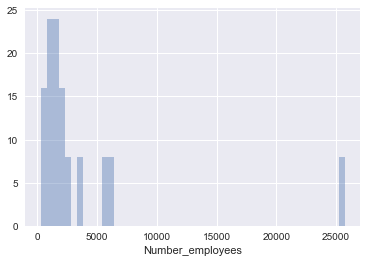

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

#to switch to seaborn defaults, simply call the set() function.
sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
sns.set_context("notebook")

# plot a univariate distribution of observations.
sns.distplot(web_scraping_df["Number_employees"],bins=50, kde=False)
plt.show()

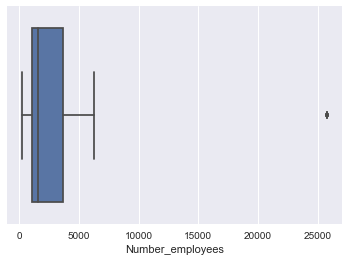

In [95]:
sns.boxplot(web_scraping_df["Number_employees"])
plt.show()

In [100]:
print('Mean: %d' % (web_scraping_df["Number_employees"].mean()))
print('Median: %d' % (web_scraping_df["Number_employees"].median()))
print('Standard deviation: %d' % (web_scraping_df["Number_employees"].std()))

Mean: 3740
Median: 1585
Standard deviation: 6140
